In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir=r'C:\Users\Raghavendra N\OneDrive\Official\Datasets\ML Datasets'

In [3]:
os.chdir(data_dir)

In [4]:
data=pd.read_csv("kc_housingdata.csv")

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
## Choose columns that are numeric and have a numeric interpretation
data_num=data[['price','bedrooms','bathrooms','sqft_living']]

In [8]:
data_num.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
dtype: object

In [9]:
data_num.head()

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680


In [12]:
## Scale the data, using pandas
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_scaled=data_num.apply(scale,axis=0)

In [13]:
data_scaled.head()

,price,bedrooms,bathrooms,sqft_living
0,-0.866717,-0.398737,-1.447464,-0.979835
1,-0.005688,-0.398737,0.175607,0.533634
2,-0.980849,-1.473959,-1.447464,-1.426254
3,0.174090,0.676485,1.149449,-0.130550
4,-0.081958,-0.398737,-0.149007,-0.435422


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dat_scaled = sc.fit_transform(data_num) 

In [11]:
dat_scaled

array([[-0.86671733, -0.39873715, -1.44746357, -0.97983502],
       [-0.00568792, -0.39873715,  0.1756067 ,  0.53363434],
       [-0.98084935, -1.47395936, -1.44746357, -1.42625404],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, -1.15404732],
       [-0.38158814, -0.39873715,  0.50022075, -0.52252773],
       [-0.58588173, -1.47395936, -1.77207762, -1.15404732]])

In [14]:
## Create a cluster model
from sklearn.cluster import KMeans

In [15]:
kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit(dat_scaled)

KMeans(n_clusters=3)

In [16]:
kmeans.labels_

array([0, 1, 0, ..., 0, 1, 0])

In [17]:
kmeans.cluster_centers_

array([[-0.46337193, -0.72331161, -0.86033942, -0.78906804],
       [-0.03374104,  0.35956031,  0.37247199,  0.22907333],
       [ 1.89209433,  1.08235139,  1.53798089,  1.92141816]])

In [18]:
## Elbow method
K=range(1,20)
wss = []
for k in K:
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(dat_scaled)
    wss.append(kmeans.inertia_)

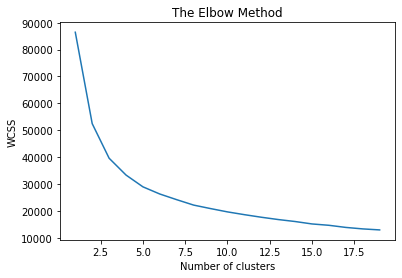

In [19]:
plt.plot(K,wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Calculating z scores

𝒁    = (𝒙 − 𝝁)/𝝈

- 𝒙 is the cluster mean
- 𝝁 is the global average
- 𝝈 is the global standard deviation

In [20]:
def get_zprofiles(data,kmeans):
    data['Labels']=kmeans.labels_
    profile=data.groupby('Labels').mean().subtract(data.drop('Labels',axis=1).mean(),axis=1)
    profile=profile.divide(data.drop('Labels',axis=1).std(),axis=1)
    profile['Size']=data['Labels'].value_counts()
    return profile

In [21]:
kmeans=KMeans(n_clusters=5,random_state=200).fit(dat_scaled)

In [22]:
get_zprofiles(data=data_num.copy(),kmeans=kmeans)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,0.961315,0.824830,1.121695,1.373511,3196
1,-0.173107,-0.496262,0.140081,-0.212603,6945
2,-0.546993,-0.838608,-1.208657,-0.954849,5529
3,-0.180438,0.896136,0.190944,0.160666,5438
4,4.228540,1.136356,2.151524,2.955348,505
